<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria_EDO/ejer_sec_3.1/Ejer_22_sec_3.1_Boyce_DiPrima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria_EDO/ejer_sec_3.1/Ejer_22_sec_3.1_Boyce_DiPrima.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Ejercicio 33 de la sección 3.1 de Boyce DiPrima
Página 144
Respuestas en la página 711

La solución de una ecuación de segundo orden de la forma 

$$ y'' = f(x,y,y') $$

suele comprender dos constantes arbitrarias. 


A la inversa, es posible demostrar que una familia dada de funciones que contiene dos constantes arbitrarias es la solución de alguna ecuación diferencial de segundo orden. 

Elimine las constantes $c_{1}$ y $c_{2}$ utilizando a $y$, $y'$ y $y''$, para encontrar la ecuación diferencial que satisface la familia de funciones dada. 

$$ y = c_{1}e^{x} + c_{2}e^{-x} $$

## Solución:

Derive dos veces 

\begin{align*}
y = c_{1}e^{x} + c_{2}e^{-x} & \Rightarrow y' = c_{1}e^{x} - c_{2}e^{-x} \\
                             & \Rightarrow y'' = c_{1}e^{x} + c_{2}e^{-x} 
\end{align*}


Por tanto, $y = y''$. 

Que es equivalente a la ecuación de segundo orden lineal:

$$ y'' - y = 0 $$


## Video complementario:
[¿Cómo encontrar la ecuación que representa a una familia de funciones?](https://www.youtube.com/watch?v=srY2a7AVn0Q)

In [8]:
#Grafica de algunas curvas integrales de y'' - y = 0 
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

plt.style.use('dark_background')


def plot_sol(c1 = 1,c2 = 1): 
    fig = plt.figure()
    ax = fig.add_subplot()
    x = np.linspace(-3,3,100)
    y = c1*np.exp(x) + c2*np.exp(-x)
    ax.plot(x,y, color = 'yellow')
    ax.set_title("Algunas curvas solución de $y = y''$")
    
interact(plot_sol, c1 = (-3,3), c2 = (-3,3))     

plt.show() 

interactive(children=(IntSlider(value=1, description='c1', max=3, min=-3), IntSlider(value=1, description='c2'…

## Ejercicio 16 de la sección 3.1 del Boyce DiPrima

Página 143

Halle $\beta$ de modo que la solución del problema con valor inicial $4y'' - y = 0$, $y(0) = 2$, $y'(0) = \beta$ tienda a cero cuando $x \to \infty$. 

## Solución analítica

### Metodología

1. Resolver la ED
2. Hallar la solución particular en función del parámetro $\beta$.
3. Determinar $\beta$ para que $\lim\limits_{x \to \infty}y = 0$

## Implementación de la metodología

$$ 4y'' - y = 0 \quad \quad \iff \quad \quad  ay'' + by' + cy = 0 $$

de donde $a = 4, b = 0$ y $c = 1$. 

$$ 4r^{2} - 1 = 0  $$

$$ (2r - 1)(2r + 1) = 0 $$

$$ r_{1} = \frac{1}{2}, \quad \quad r_{2} = -\frac{1}{2} $$

$$ y_{1} = e^{x/2}, \quad \quad y_{2} = e^{-x/2} $$

$$ y = c_{1}y_{1} + c_{2}y_{2} = c_{1}e^{x/2} + c_{2}e^{-x/2} $$

## Trazado de algunas curvas integrales

In [52]:
import numpy as np 
from ipywidgets import interact 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

def plot_animado(c1 = -3, c2 = -3):
    x = np.linspace(-3,13)
    y = c1*np.exp(x/2) + c2*np.exp(-x/2) 
    fig = plt.figure()
    ax = fig.add_subplot() 
    ax.plot(x,y, color = 'yellow') 
    ax.plot([-3,13],[0,0], color = 'cyan') 
    ax.grid(True, alpha = 0.3) 
    ax.axis([-3,13, -10,10]) 
    
interact(plot_animado,c1 = (-3,3), c2 = (-3,3)) 

plt.show() 

interactive(children=(IntSlider(value=-3, description='c1', max=3, min=-3), IntSlider(value=-3, description='c…

$$ y' = c_{1}y_{1}' + c_{2}y_{2}' = \frac{1}{2}c_{1}e^{x/2} - \frac{1}{2}c_{2}e^{-x/2} $$

$y(0) = 2$, $y'(0) = \beta$

\begin{align*}
c_{1} + c_{2} & = 2 \\
\frac{1}{2}c_{1} - \frac{1}{2}c_{2} & = \beta 
\end{align*}


\begin{align*}
c_{1} + c_{2} & = 2 \\
c_{1} - c_{2} & = 2\beta 
\end{align*}


$$ 2c_{1} = 2 + 2\beta \quad \quad \to \quad \quad c_{1} = 1 + \beta $$

$$ c_{2} = 2 - c_{1} = 2 - (1 + \beta) = 1 - \beta $$

$$ y = (1+\beta)e^{x/2} + (1-\beta)e^{-x/2} $$

Note que para $\beta \neq -1$ y $\beta \neq 1$ se tiene que 

$$ \lim_{x \to \infty} y = \infty + 0 = \infty $$

## Solución con Sympy

In [27]:
from sympy import * 
x,y,b = symbols('x y b') 
y = Function('y')(x)
ed = 4*diff(y,x,2) - y
solucion = dsolve(ed,y)  
solucion

Eq(y(x), C1/sqrt(exp(x)) + C2*sqrt(exp(x)))

## Determinación animada de la solución

In [51]:
import numpy as np 
from ipywidgets import interact 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

def plot_animado(beta = -3):
    x = np.linspace(-3,13)
    y = (1+beta)*np.exp(x/2) + (1-beta)*np.exp(-x/2) 
    fig = plt.figure()
    ax = fig.add_subplot() 
    ax.plot(x,y, color = 'yellow') 
    ax.plot([-3,13],[0,0], color = 'cyan') 
    ax.grid(True, alpha = 0.3) 
    ax.axis([-3,13, -10,10]) 
    
interact(plot_animado,beta = (-3,3)) 

plt.show() 

interactive(children=(IntSlider(value=-3, description='beta', max=3, min=-3), Output()), _dom_classes=('widget…

## Gráfica de la función solución

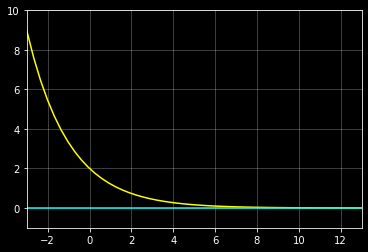

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

beta = -1 

x = np.linspace(-3,13)
y = (1+beta)*np.exp(x/2) + (1-beta)*np.exp(-x/2) 
fig = plt.figure()
ax = fig.add_subplot() 
ax.plot(x,y, color = 'yellow') 
ax.plot([-3,13],[0,0], color = 'cyan') 
ax.grid(True, alpha = 0.3) 
ax.axis([-3,13, -1,10])  

plt.savefig('sol_ejer_16_sec_3_1.jpg')

plt.show() 

## Video de apoyo para la comprensión de la solución 
[Ejercicio 16 de la sección 3.1 del Boyce DiPrima](https://www.youtube.com/watch?v=I3oGEHXrDLE)